### Prototyping the Analysis Pipeline for the Oberisk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

import plotly.express as px
import shap

---

### Example of a simple pre-trained model from Scikit-learn

Training a logistic regression here, that can be loaded to make predictions on user input on the web dashboard.

Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html


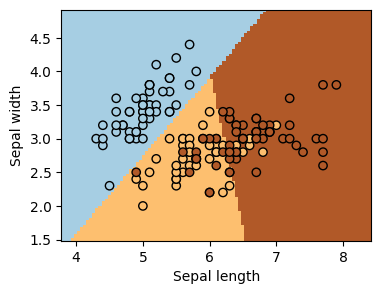

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

## Exporting a pretrained model

In the dashboard, you should load a pre-trained model that was designed and evaluated in the jupyter notebook. You can do it with `pickle` or any alternative for the same purpose.

In [3]:
import pickle

In [4]:
# Save in the `assets` folder so that it is accessible from the web dashboard
file_path = "../assets/trained_model.pickle"
data_to_save = logreg

# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

In [5]:
# Load model
pre_trained_model_path = "../assets/trained_model.pickle"
loaded_model = None # This will be replaced by the trained model in the pickle 

with open(pre_trained_model_path, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [6]:
loaded_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
# Sepal [length, width]
user_data = [[5, 4]] # Must be 2D array
prediction = loaded_model.predict(user_data)

print(f"The predicted value for data {user_data} is {prediction}")

The predicted value for data [[5, 4]] is [0]
